# Tarefa

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest

In [25]:
pg = sns.load_dataset('penguins')

In [52]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


In [46]:
(666.172050**2+787.628884**2)/2

532072.229556144

<Axes: xlabel='sex', ylabel='body_mass_g'>

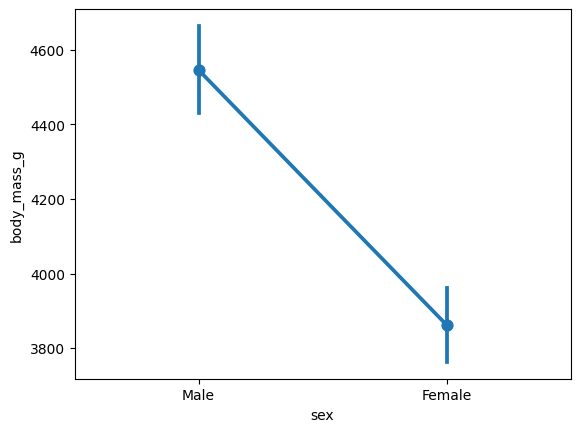

In [ ]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [43]:
# Via statsmodels

x1 = pg.loc[pg['sex'] == 'Female', 'body_mass_g']
x2 = pg.loc[pg['sex'] == 'Male', 'body_mass_g']

teste_f = ztest(x1, x2, alternative='two-sided', usevar='pooled', value=0)

print('ztest')
print(f'Estatística do teste: {teste_f[0]:.2f}')
print(f'             P-value: {teste_f[1]:.4f}')

teste_t = ttest_ind(x1, x2, alternative='two-sided', usevar='unequal', value=0)

print('\nttest')
print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

ztest
Estatística do teste: -8.54
             P-value: 0.0000

ttest
Estatística do teste: -8.55
             P-value: 0.0000
  Graus de liberdade: 323.90


## Resposta:

Antes de se realizar o teste t é preciso realizar o teste f, pois a partir deste teste pode-se determinar se as variâncias são equivalentes ou não.

H0: variancia1 = variancia2

H1: variancia1 != variancia2

O valor do p-value deu menor que 5% para bicaudal, portanto a probabilidade de erro ao rejeitar H0 e ficar com H1 é de menos que 5%. Dessa forma eu posso assumir que as variâncias entre o peso dos pinguins machos e femeas não são equivalentes.

---

Sabendo que as variâncias são diferentes vou realizar o teste t para variâncias não equivalentes.

H0: média1 = média2

H1: média1 != média2

Como valor obtido para o p-value foi menor que 5% para bicaudal eu posso assumir que a probabilidade de estar errado ao rejeitar H0 é menor do que 5%. Portanto, a partir dos dados de peso dos pinguins da base de dados fornecida, pode-se assumir que o peso médio dos pinguins machos e fêmeas é diferente para toda a população.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [79]:
# Para realizar a análise de peso dos pinguins tomando como base a espécie dos pinguins.
# Antes de mais nada é preciso saber quantas espécies existem na base e quais são elas.

pg['species'].unique()

# Na base de dados existem três espécies de pinguim.

# Como o teste t compara duas amostras, os testes realizados anteriormente deverão ser realizados 03 vezes.
# (Adelie x Chinstrap), (Chinstrap x Gentoo) e (Adelie x Gentoo)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [80]:
# Removendo os dados em branco

pg = pg.dropna()

In [81]:
# Adelie x Chinstrap

x1 = pg.loc[pg['species'] == 'Adelie', 'body_mass_g']
x2 = pg.loc[pg['species'] == 'Chinstrap', 'body_mass_g']

teste_f = ztest(x1, x2, alternative='two-sided', usevar='pooled', value=0)

print('ztest')
print(f'Estatística do teste: {teste_f[0]:.2f}')
print(f'             P-value: {teste_f[1]:.4f}')

teste_t = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', value=0)

print('\nttest')
print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

ztest
Estatística do teste: -0.42
             P-value: 0.6744

ttest
Estatística do teste: -0.42
             P-value: 0.6748
  Graus de liberdade: 212.00


In [76]:
# Chinstrap x Gentoo

x1 = pg.loc[pg['species'] == 'Chinstrap', 'body_mass_g']
x2 = pg.loc[pg['species'] == 'Gentoo', 'body_mass_g']

teste_f = ztest(x1, x2, alternative='two-sided', usevar='pooled', value=0)

print('ztest')
print(f'Estatística do teste: {teste_f[0]:.2f}')
print(f'             P-value: {teste_f[1]:.4f}')

teste_t = ttest_ind(x1, x2, alternative='two-sided', usevar='unequal', value=0)

print('\nttest')
print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

ztest
Estatística do teste: -19.33
             P-value: 0.0000

ttest
Estatística do teste: -20.76
             P-value: 0.0000
  Graus de liberdade: 169.62


In [78]:
# Gentoo x Adelie

x1 = pg.loc[pg['species'] == 'Gentoo', 'body_mass_g']
x2 = pg.loc[pg['species'] == 'Adelie', 'body_mass_g']

teste_f = ztest(x1, x2, alternative='two-sided', usevar='pooled', value=0)

print('ztest')
print(f'Estatística do teste: {teste_f[0]:.2f}')
print(f'             P-value: {teste_f[1]:.4f}')

teste_t = ttest_ind(x1, x2, alternative='two-sided', usevar='unequal', value=0)

print('\nttest')
print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

ztest
Estatística do teste: 23.47
             P-value: 0.0000

ttest
Estatística do teste: 23.25
             P-value: 0.0000
  Graus de liberdade: 242.14


1. O teste f foi aplicado para todas as combinações
2. Apenas a comparação entre a espécie Adelie e Chinstrap apresentou probabilidade de erro associado a rejeitar H0, em que assumir que as variâncias não são iguais é maior que 5%. Portanto, para esse caso assumiu-se que as variâncias são iguais.
3. O teste t foi aplicado para todas as combinações
4. Apenas a comparação entre a espécie Adelie e Chinstrap apresentou probabilidade de erro associado a rejeitar H0, em que assumir que as médias não são iguais é maior que 5%. Portanto, para esse caso assumiu-se que as médias são iguais. Ou melhor dizendo não existe embasamento estatístico suficiente para se afirmar que as médias de peso entre essas duas espécies é diferente.
5. O Oposto ocorre ao se realizar as demais comparações, não existem dados estatísticos suficiente para se negar que as médias de peso entre as espécies comparadas é igual.
